In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from keras.models import Sequential,load_model
from keras.layers import Dense,Softmax
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
data=pd.read_csv(r'Employee_attirtion.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C6DF25D30>,
      dtype=object)

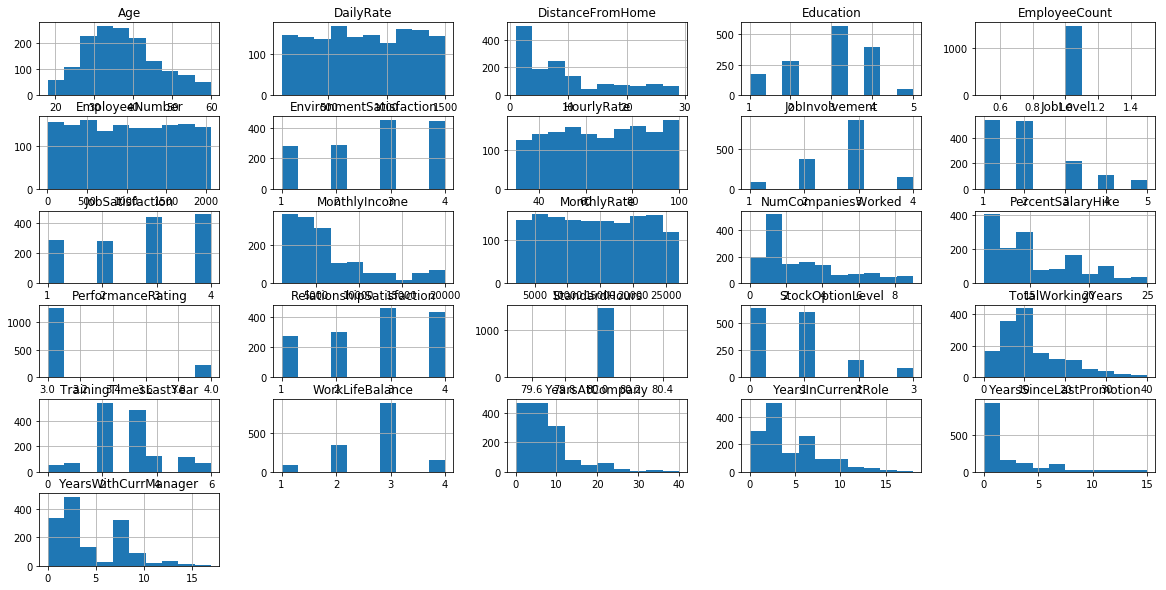

In [7]:
data.hist(figsize=(20,10))

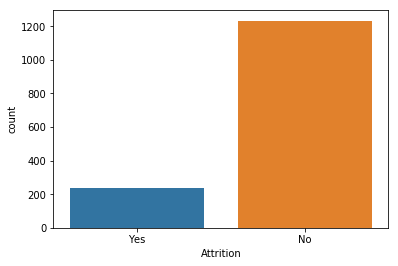

In [8]:
sns.countplot(data['Attrition'])# showing class imbalancing

# sampling

In [60]:
Total_sample=1400
percent_no=30
data_no=data[data['Attrition']=='No'].sample(n=int((percent_no*Total_sample/100)))
data_no['Attrition'].apply(lambda x:'Yes')
data_no.shape
data_yes=pd.concat([data[data['Attrition']=='Yes'],data_no],axis=0)

In [10]:
data_yes.shape
data_no.shape

(420, 35)

In [11]:
sampled_data=pd.concat([data_yes,data_no],axis=0)

In [12]:
sampled_data.shape

(1077, 35)

In [13]:
from sklearn.utils import shuffle
Sampled_data=shuffle(sampled_data)

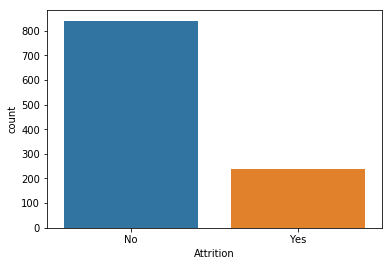

In [14]:
sns.countplot(Sampled_data['Attrition'])

# Label Encoding

In [15]:
columns=Sampled_data.columns
label_encoder=LabelEncoder()
for cols in columns:
   # print(cols)
    if(isinstance(Sampled_data[cols].values[0],str)):
        Sampled_data[cols]=label_encoder.fit_transform(Sampled_data[cols].values)

In [16]:
x=Sampled_data.drop('Attrition',axis=1)
y=Sampled_data['Attrition']

In [17]:
X,Y=SMOTE().fit_sample(x,y)

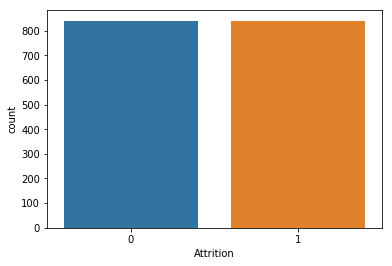

In [18]:
sns.countplot(Y)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=0)

In [20]:
y_train_cat=to_categorical(y_train,2)
y_test_cat=to_categorical(y_test,2)

In [21]:
model=Sequential()
model.add(Dense(30,input_dim=x_train.shape[1]))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(6))
model.add(Dense(2,activation='softmax'))

In [22]:
filepath="Employee_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train_cat,epochs=100,callbacks=callbacks_list,validation_data=(x_test,y_test_cat),verbose=1)

Train on 1344 samples, validate on 336 samples
Epoch 1/100
1344/1344 [==============================] - 0s 150us/step - loss: 1820.2319 - accuracy: 0.4680 - val_loss: 263.4413 - val_accuracy: 0.5149

Epoch 00001: val_accuracy improved from -inf to 0.51488, saving model to Employee_weights-improvement-01-0.51.hdf5
Epoch 2/100
1344/1344 [==============================] - 0s 53us/step - loss: 141.0331 - accuracy: 0.5164 - val_loss: 102.9883 - val_accuracy: 0.5238

Epoch 00002: val_accuracy improved from 0.51488 to 0.52381, saving model to Employee_weights-improvement-02-0.52.hdf5
Epoch 3/100
1344/1344 [==============================] - 0s 49us/step - loss: 56.2660 - accuracy: 0.5186 - val_loss: 25.7490 - val_accuracy: 0.5893

Epoch 00003: val_accuracy improved from 0.52381 to 0.58929, saving model to Employee_weights-improvement-03-0.59.hdf5
Epoch 4/100
1344/1344 [==============================] - 0s 43us/step - loss: 31.1382 - accuracy: 0.5484 - val_loss: 92.8009 - val_accuracy: 0.5089



1344/1344 [==============================] - 0s 40us/step - loss: 21.2712 - accuracy: 0.5632 - val_loss: 3.4074 - val_accuracy: 0.6845

Epoch 00039: val_accuracy did not improve from 0.71726
Epoch 40/100
1344/1344 [==============================] - 0s 39us/step - loss: 30.0716 - accuracy: 0.5513 - val_loss: 43.0824 - val_accuracy: 0.5000

Epoch 00040: val_accuracy did not improve from 0.71726
Epoch 41/100
1344/1344 [==============================] - 0s 37us/step - loss: 28.4395 - accuracy: 0.5610 - val_loss: 19.0157 - val_accuracy: 0.5327

Epoch 00041: val_accuracy did not improve from 0.71726
Epoch 42/100
1344/1344 [==============================] - 0s 43us/step - loss: 15.0393 - accuracy: 0.5818 - val_loss: 18.4444 - val_accuracy: 0.5327

Epoch 00042: val_accuracy did not improve from 0.71726
Epoch 43/100
1344/1344 [==============================] - 0s 40us/step - loss: 19.9013 - accuracy: 0.5640 - val_loss: 16.2294 - val_accuracy: 0.5863

Epoch 00043: val_accuracy did not improve fr


Epoch 00078: val_accuracy did not improve from 0.72917
Epoch 79/100
1344/1344 [==============================] - 0s 35us/step - loss: 17.5199 - accuracy: 0.5580 - val_loss: 5.4089 - val_accuracy: 0.7054

Epoch 00079: val_accuracy did not improve from 0.72917
Epoch 80/100
1344/1344 [==============================] - 0s 40us/step - loss: 12.6401 - accuracy: 0.5818 - val_loss: 11.0568 - val_accuracy: 0.5179

Epoch 00080: val_accuracy did not improve from 0.72917
Epoch 81/100
1344/1344 [==============================] - 0s 37us/step - loss: 14.8407 - accuracy: 0.5670 - val_loss: 6.1858 - val_accuracy: 0.6012

Epoch 00081: val_accuracy did not improve from 0.72917
Epoch 82/100
1344/1344 [==============================] - 0s 37us/step - loss: 6.4258 - accuracy: 0.6265 - val_loss: 3.3068 - val_accuracy: 0.7143

Epoch 00082: val_accuracy did not improve from 0.72917
Epoch 83/100
1344/1344 [==============================] - 0s 37us/step - loss: 8.9829 - accuracy: 0.6272 - val_loss: 7.2421 - va

In [25]:
model.save(r'C:\Users\Balagopal\Desktop\Project\Capstone\Employee_attrition.h5')


In [26]:
Model=load_model(r'C:\Users\Balagopal\Desktop\Project\Capstone\Employee_attrition.h5')

In [27]:
Model.load_weights(r'Employee_weights-improvement-65-0.73.hdf5')

In [28]:
Model.evaluate(x_test,y_test_cat)

336/336 [==============================] - 0s 86us/step


[4.943962846483503, 0.7291666865348816]

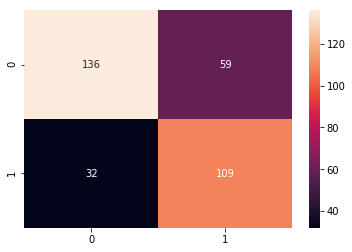

In [29]:
sns.heatmap(confusion_matrix(Model.predict_classes(x_test),y_test),annot=True,fmt='d')

In [30]:
acc_ann=Model.evaluate(x_test,y_test_cat)[1]

336/336 [==============================] - 0s 21us/step


In [31]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [54]:
acc_rf=rf.score(x_test,y_test)

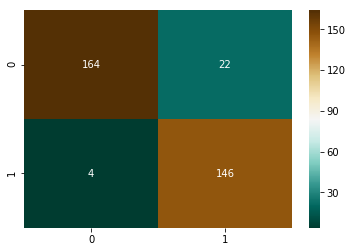

In [33]:
sns.heatmap(confusion_matrix(rf.predict(x_test),y_test),annot=True,cmap='BrBG_r',fmt='d')

In [34]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
svm.score(x_test,y_test)

0.7827380952380952

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
acc_knn=knn.score(x_test,y_test)

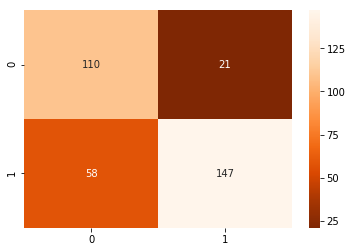

In [39]:
sns.heatmap(confusion_matrix(knn.predict(x_test),y_test),annot=True,cmap='Oranges_r',fmt='d')

Accuracy using smote


In [40]:
acc_result={'RF':acc_rf,'ANN':acc_ann,'KNN':acc_knn}
Acc_result=pd.DataFrame(acc_result,index=['Smote'])
Acc_result

,RF,ANN,KNN
Smote,0.922619,0.729167,0.764881


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

In [42]:
y_train_cat=to_categorical(y_train,2)
y_test_cat=to_categorical(y_test,2)

In [43]:
model=Sequential()
model.add(Dense(30,input_dim=x_train.shape[1]))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(6))
model.add(Dense(2,activation='softmax'))

In [44]:
filepath="Employee_weights-improvement_random-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
history=model.fit(x_train,y_train_cat,epochs=100,callbacks=callbacks_list,validation_data=(x_test,y_test_cat),verbose=1)

Train on 861 samples, validate on 216 samples
Epoch 1/100
861/861 [==============================] - 0s 193us/step - loss: 963.7949 - accuracy: 0.6492 - val_loss: 252.9221 - val_accuracy: 0.7870

Epoch 00001: val_accuracy improved from -inf to 0.78704, saving model to Employee_weights-improvement_random-01-0.79.hdf5
Epoch 2/100
861/861 [==============================] - 0s 56us/step - loss: 152.9316 - accuracy: 0.6887 - val_loss: 106.4431 - val_accuracy: 0.6713

Epoch 00002: val_accuracy did not improve from 0.78704
Epoch 3/100
861/861 [==============================] - 0s 55us/step - loss: 69.1908 - accuracy: 0.6934 - val_loss: 42.8915 - val_accuracy: 0.6759

Epoch 00003: val_accuracy did not improve from 0.78704
Epoch 4/100
861/861 [==============================] - 0s 57us/step - loss: 42.9268 - accuracy: 0.6655 - val_loss: 8.6224 - val_accuracy: 0.6574

Epoch 00004: val_accuracy did not improve from 0.78704
Epoch 5/100
861/861 [==============================] - 0s 54us/step - loss:

861/861 [==============================] - 0s 39us/step - loss: 38.9865 - accuracy: 0.6887 - val_loss: 27.2090 - val_accuracy: 0.2500

Epoch 00040: val_accuracy did not improve from 0.81944
Epoch 41/100
861/861 [==============================] - 0s 41us/step - loss: 18.0822 - accuracy: 0.6957 - val_loss: 17.0713 - val_accuracy: 0.7731

Epoch 00041: val_accuracy did not improve from 0.81944
Epoch 42/100
861/861 [==============================] - 0s 40us/step - loss: 25.4012 - accuracy: 0.6643 - val_loss: 25.0403 - val_accuracy: 0.7870

Epoch 00042: val_accuracy did not improve from 0.81944
Epoch 43/100
861/861 [==============================] - 0s 46us/step - loss: 34.0079 - accuracy: 0.6899 - val_loss: 37.1938 - val_accuracy: 0.7778

Epoch 00043: val_accuracy did not improve from 0.81944
Epoch 44/100
861/861 [==============================] - 0s 45us/step - loss: 27.0339 - accuracy: 0.6899 - val_loss: 12.1666 - val_accuracy: 0.7130

Epoch 00044: val_accuracy did not improve from 0.8194

861/861 [==============================] - 0s 34us/step - loss: 19.6710 - accuracy: 0.6783 - val_loss: 31.5692 - val_accuracy: 0.7778

Epoch 00080: val_accuracy did not improve from 0.81944
Epoch 81/100
861/861 [==============================] - 0s 32us/step - loss: 37.4745 - accuracy: 0.7154 - val_loss: 17.6162 - val_accuracy: 0.7824

Epoch 00081: val_accuracy did not improve from 0.81944
Epoch 82/100
861/861 [==============================] - 0s 34us/step - loss: 17.6483 - accuracy: 0.7201 - val_loss: 25.4136 - val_accuracy: 0.4676

Epoch 00082: val_accuracy did not improve from 0.81944
Epoch 83/100
861/861 [==============================] - 0s 35us/step - loss: 38.2661 - accuracy: 0.6911 - val_loss: 23.3008 - val_accuracy: 0.6435

Epoch 00083: val_accuracy did not improve from 0.81944
Epoch 84/100
861/861 [==============================] - 0s 36us/step - loss: 17.1241 - accuracy: 0.6934 - val_loss: 11.1772 - val_accuracy: 0.7963

Epoch 00084: val_accuracy did not improve from 0.8194

In [47]:
model.load_weights('Employee_weights-improvement_random-16-0.80.hdf5')

In [48]:
Acc_ann=model.evaluate(x_test,y_test_cat)[1]

216/216 [==============================] - 0s 32us/step


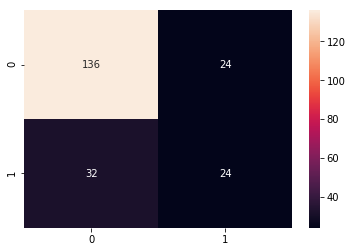

In [49]:
sns.heatmap(confusion_matrix(Model.predict_classes(x_test),y_test),annot=True,fmt='d')

In [50]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
Acc_rf=rf.score(x_test,y_test)

In [51]:
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
Acc_Knn=Knn.score(x_test,y_test)

Accuracy for random over sampling

In [52]:
acc_result1={'RF':Acc_rf,'ANN':Acc_ann,'KNN':Acc_Knn}
Acc_result1=pd.DataFrame(acc_result1,index=['over sampling'])
Acc_result1

,RF,ANN,KNN
over sampling,0.814815,0.800926,0.782407


In [53]:
overall_accuracy=pd.concat((Acc_result,Acc_result1),axis=0)
overall_accuracy

,RF,ANN,KNN
Smote,0.922619,0.729167,0.764881
over sampling,0.814815,0.800926,0.782407
